In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

data = pd.read_csv('generated/face_data.csv')

data['embedding'] = data['embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
embeddings = np.stack(data['embedding'].values)


In [ ]:
embeddings = StandardScaler().fit_transform(embeddings)

In [ ]:
distance_matrix = cosine_distances(embeddings)

db = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
clusters = db.fit_predict(distance_matrix)

In [ ]:
data['cluster'] = clusters

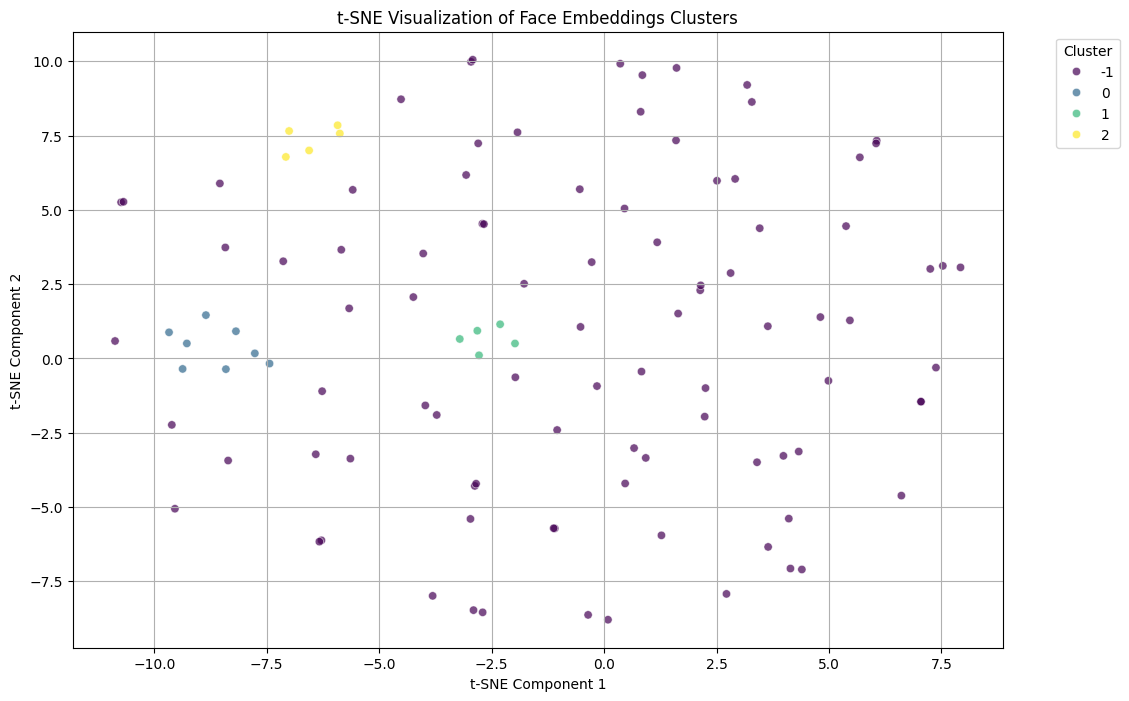

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

plot_data = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
plot_data['cluster'] = data['cluster']


plt.figure(figsize=(12, 8))
sns.scatterplot(x='x', y='y', hue='cluster', data=plot_data, palette='viridis', legend='full', alpha=0.7)
plt.title('t-SNE Visualization of Face Embeddings Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

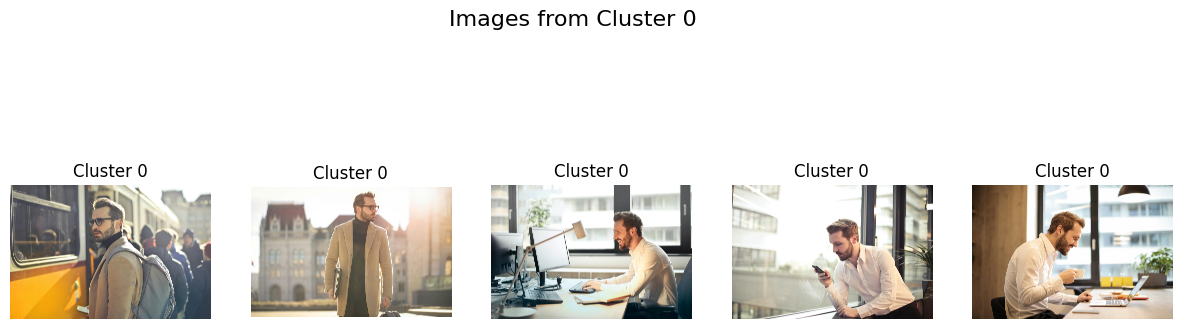

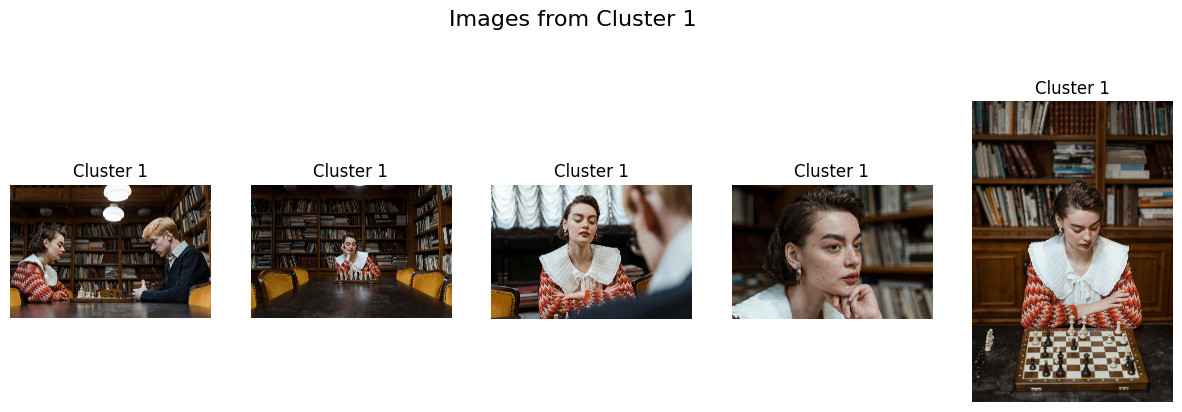

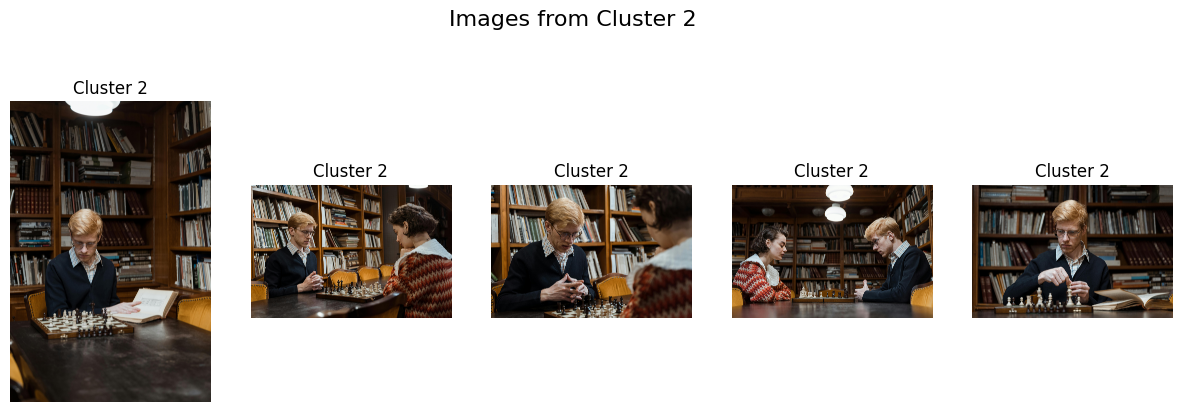

In [21]:
def plot_images_in_clusters(data, n_images_per_cluster=5, max_clusters=3):
    unique_clusters = data['cluster'].unique()


    cluster_counter = 0

    for cluster in unique_clusters:
        if cluster_counter >= max_clusters:
            break
        
        if cluster == -1:
            continue
        
        plt.figure(figsize=(15, 5))
        cluster_data = data[data['cluster'] == cluster]
        
        sample_data = cluster_data.sample(n=min(n_images_per_cluster, len(cluster_data)))
        
        for i, (index, row) in enumerate(sample_data.iterrows()):
            img = plt.imread(row['file_path']) 
            plt.subplot(1, n_images_per_cluster, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Cluster {cluster}')
        
        plt.suptitle(f'Images from Cluster {cluster}', fontsize=16)
        plt.show()

        cluster_counter += 1

plot_images_in_clusters(data)

In [4]:
data_large = pd.read_csv('generated/large_dataset_face_data.csv')

data_large['embedding'] = data_large['embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
embeddings = np.stack(data_large['embedding'].values)

embeddings = StandardScaler().fit_transform(embeddings)

In [5]:
distance_matrix = cosine_distances(embeddings)

db = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
clusters = db.fit_predict(distance_matrix)

data_large['cluster'] = clusters

In [8]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

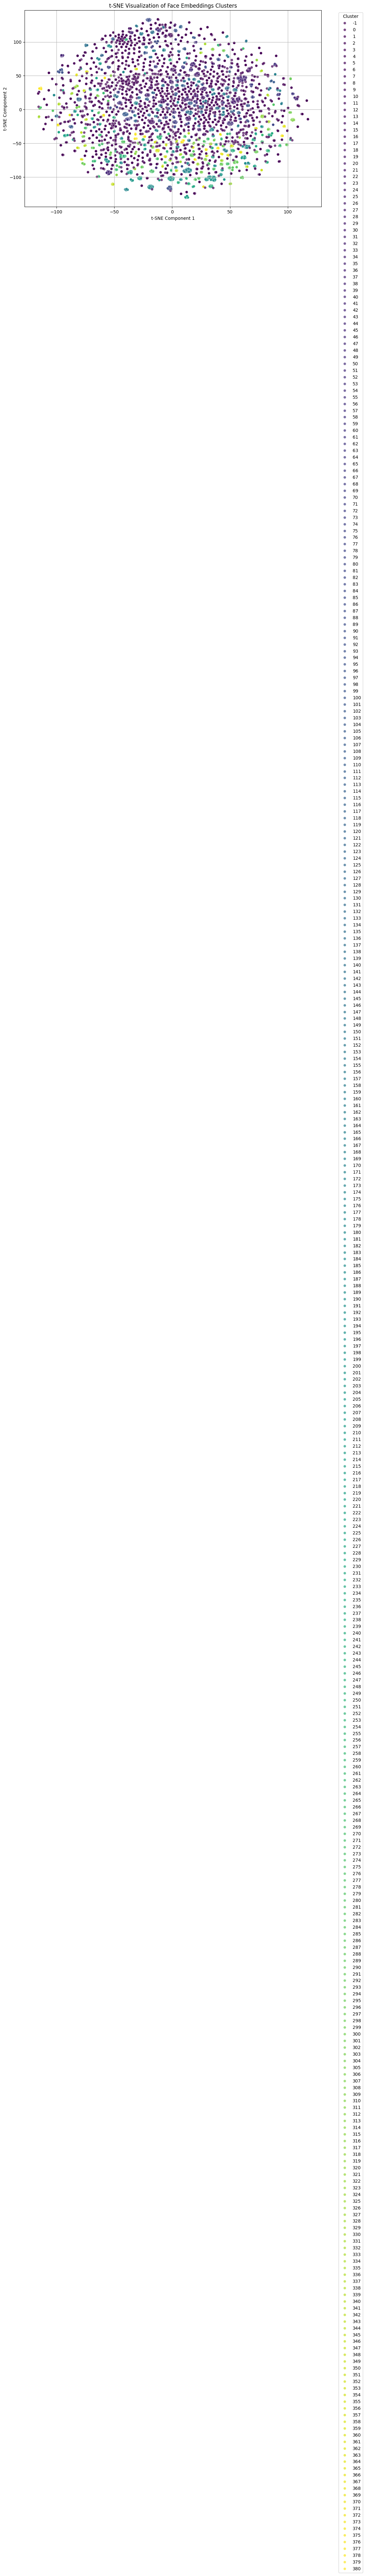

In [10]:
plot_data = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
plot_data['cluster'] = data_large['cluster']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='x', y='y', hue='cluster', data=plot_data, palette='viridis', legend='full', alpha=0.7)
plt.title('t-SNE Visualization of Face Embeddings Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
plot_images_in_clusters(data_large)